# Predecting the FIFA Player Rating

## Scope: Predecting the FIFA players rating using the supervised learning utilizing the players data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot 
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
fifa_original=pd.read_csv('players_22.csv')


In [5]:
fifa_original.dtypes

sofifa_id                   int64
player_url                 object
short_name                 object
long_name                  object
player_positions           object
                            ...  
goalkeeping_diving          int64
goalkeeping_handling        int64
goalkeeping_kicking         int64
goalkeeping_positioning     int64
goalkeeping_reflexes        int64
Length: 77, dtype: object

In [6]:
fifa_original.head(10)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,75,96,20,35,24,6,11,15,14,8
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,90,88,35,42,19,15,6,12,8,10
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,88,95,24,32,24,7,11,15,14,11
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,93,93,35,32,29,9,9,15,15,11
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,83,89,68,65,53,15,13,5,10,13
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,11,68,27,12,18,87,92,78,90,90
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,79,88,26,34,32,13,5,7,11,6
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,47,70,17,10,11,88,88,91,89,88
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,25,70,25,13,10,88,85,88,88,90
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,91,91,50,36,38,8,10,11,14,11


Removing uneccessary columns  

In [7]:
fifa_original = fifa_original.drop(['sofifa_id',
                                   'player_url',
                                   'long_name',
                                   'league_level',
                                   'player_positions',
                                   'body_type',
                                   'real_face',
                                   'release_clause_eur',
                                   'player_tags',
                                   'club_jersey_number',
                                   'club_loaned_from',
                                   'club_contract_valid_until',
                                   'club_joined',
                                   'nation_position',
                                   'nation_jersey_number',
                                   'player_traits',
                                   'defending_marking_awareness',
                                   'dob',
                                   'nation_team_id',
                                   'nationality_id',
                                   'club_team_id'],axis=1)

In [8]:
fifa_original.columns[fifa_original.isna().any()].tolist()

['value_eur',
 'wage_eur',
 'club_name',
 'league_name',
 'club_position',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic']

In [9]:
fifa_original = fifa_original[fifa_original.value_eur.notna()]


In [10]:
fifa_original.columns[fifa_original.isna().any()].tolist()


['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

In [11]:
fifa_GK = fifa_original[fifa_original["club_position"].isin(['GK'])]
fifa_GK[['pace','shooting','passing','dribbling','defending','physic']]

,pace,shooting,passing,dribbling,defending,physic
5,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
17888,NaN,NaN,NaN,NaN,NaN,NaN
18316,NaN,NaN,NaN,NaN,NaN,NaN
18440,NaN,NaN,NaN,NaN,NaN,NaN
18482,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
fifa_GK.shape

(701, 56)

In [13]:
fifa_GK.columns[fifa_GK.isna().any()].tolist()

['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

In [14]:
fifa_GK = fifa_GK.drop(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'],axis=1)

In [15]:
fifa_GK.columns[fifa_GK.isna().any()].tolist()

[]

In [16]:
# Since the goal is to predict the overall of the "Outfield players" only, we can drop the goalkeepers
fifa_original = fifa_original.drop(fifa_original[fifa_original["club_position"].isin(['GK'])].index)
# Dropped all the goal keepers from the data set

In [17]:
# Still some remaining null values in the below columns 
fifa_original.columns[fifa_original.isna().any()].tolist()

['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

In [18]:
# The remaining null values are also goalkeepers who are in the substitute and reserve positions 
fifa_original_null = fifa_original[fifa_original.isna().any(axis=1)]
fifa_original_null[['short_name',"club_position"]]

,short_name,club_position
26,K. Navas,SUB
143,Sergio Asenjo,SUB
216,A. Areola,SUB
222,Neto,SUB
243,P. Gollini,SUB
...,...,...
19210,Gao Xiang,SUB
19216,H. Wiles-Richards,RES
19225,D. Da Silva,RES
19227,A. Shaikh,SUB


In [19]:
# Dropped all the remaining rows which contain null values 
fifa_original = fifa_original.dropna()

In [20]:
# No null values present 
fifa_original.columns[fifa_original.isna().any()].tolist()


[]

In [21]:
fifa_original.columns

Index(['short_name', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_name', 'league_name', 'club_position',
       'nationality_name', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing

In [22]:
# Dropped the columns related to goalkeeper attributes(which are of no use now)
fifa_original = fifa_original.drop(['goalkeeping_diving',
                                   'goalkeeping_handling',
                                    'goalkeeping_kicking',
                                    'goalkeeping_positioning',
                                    'goalkeeping_reflexes'],axis=1)

Exploratory Analysis

<Axes: >

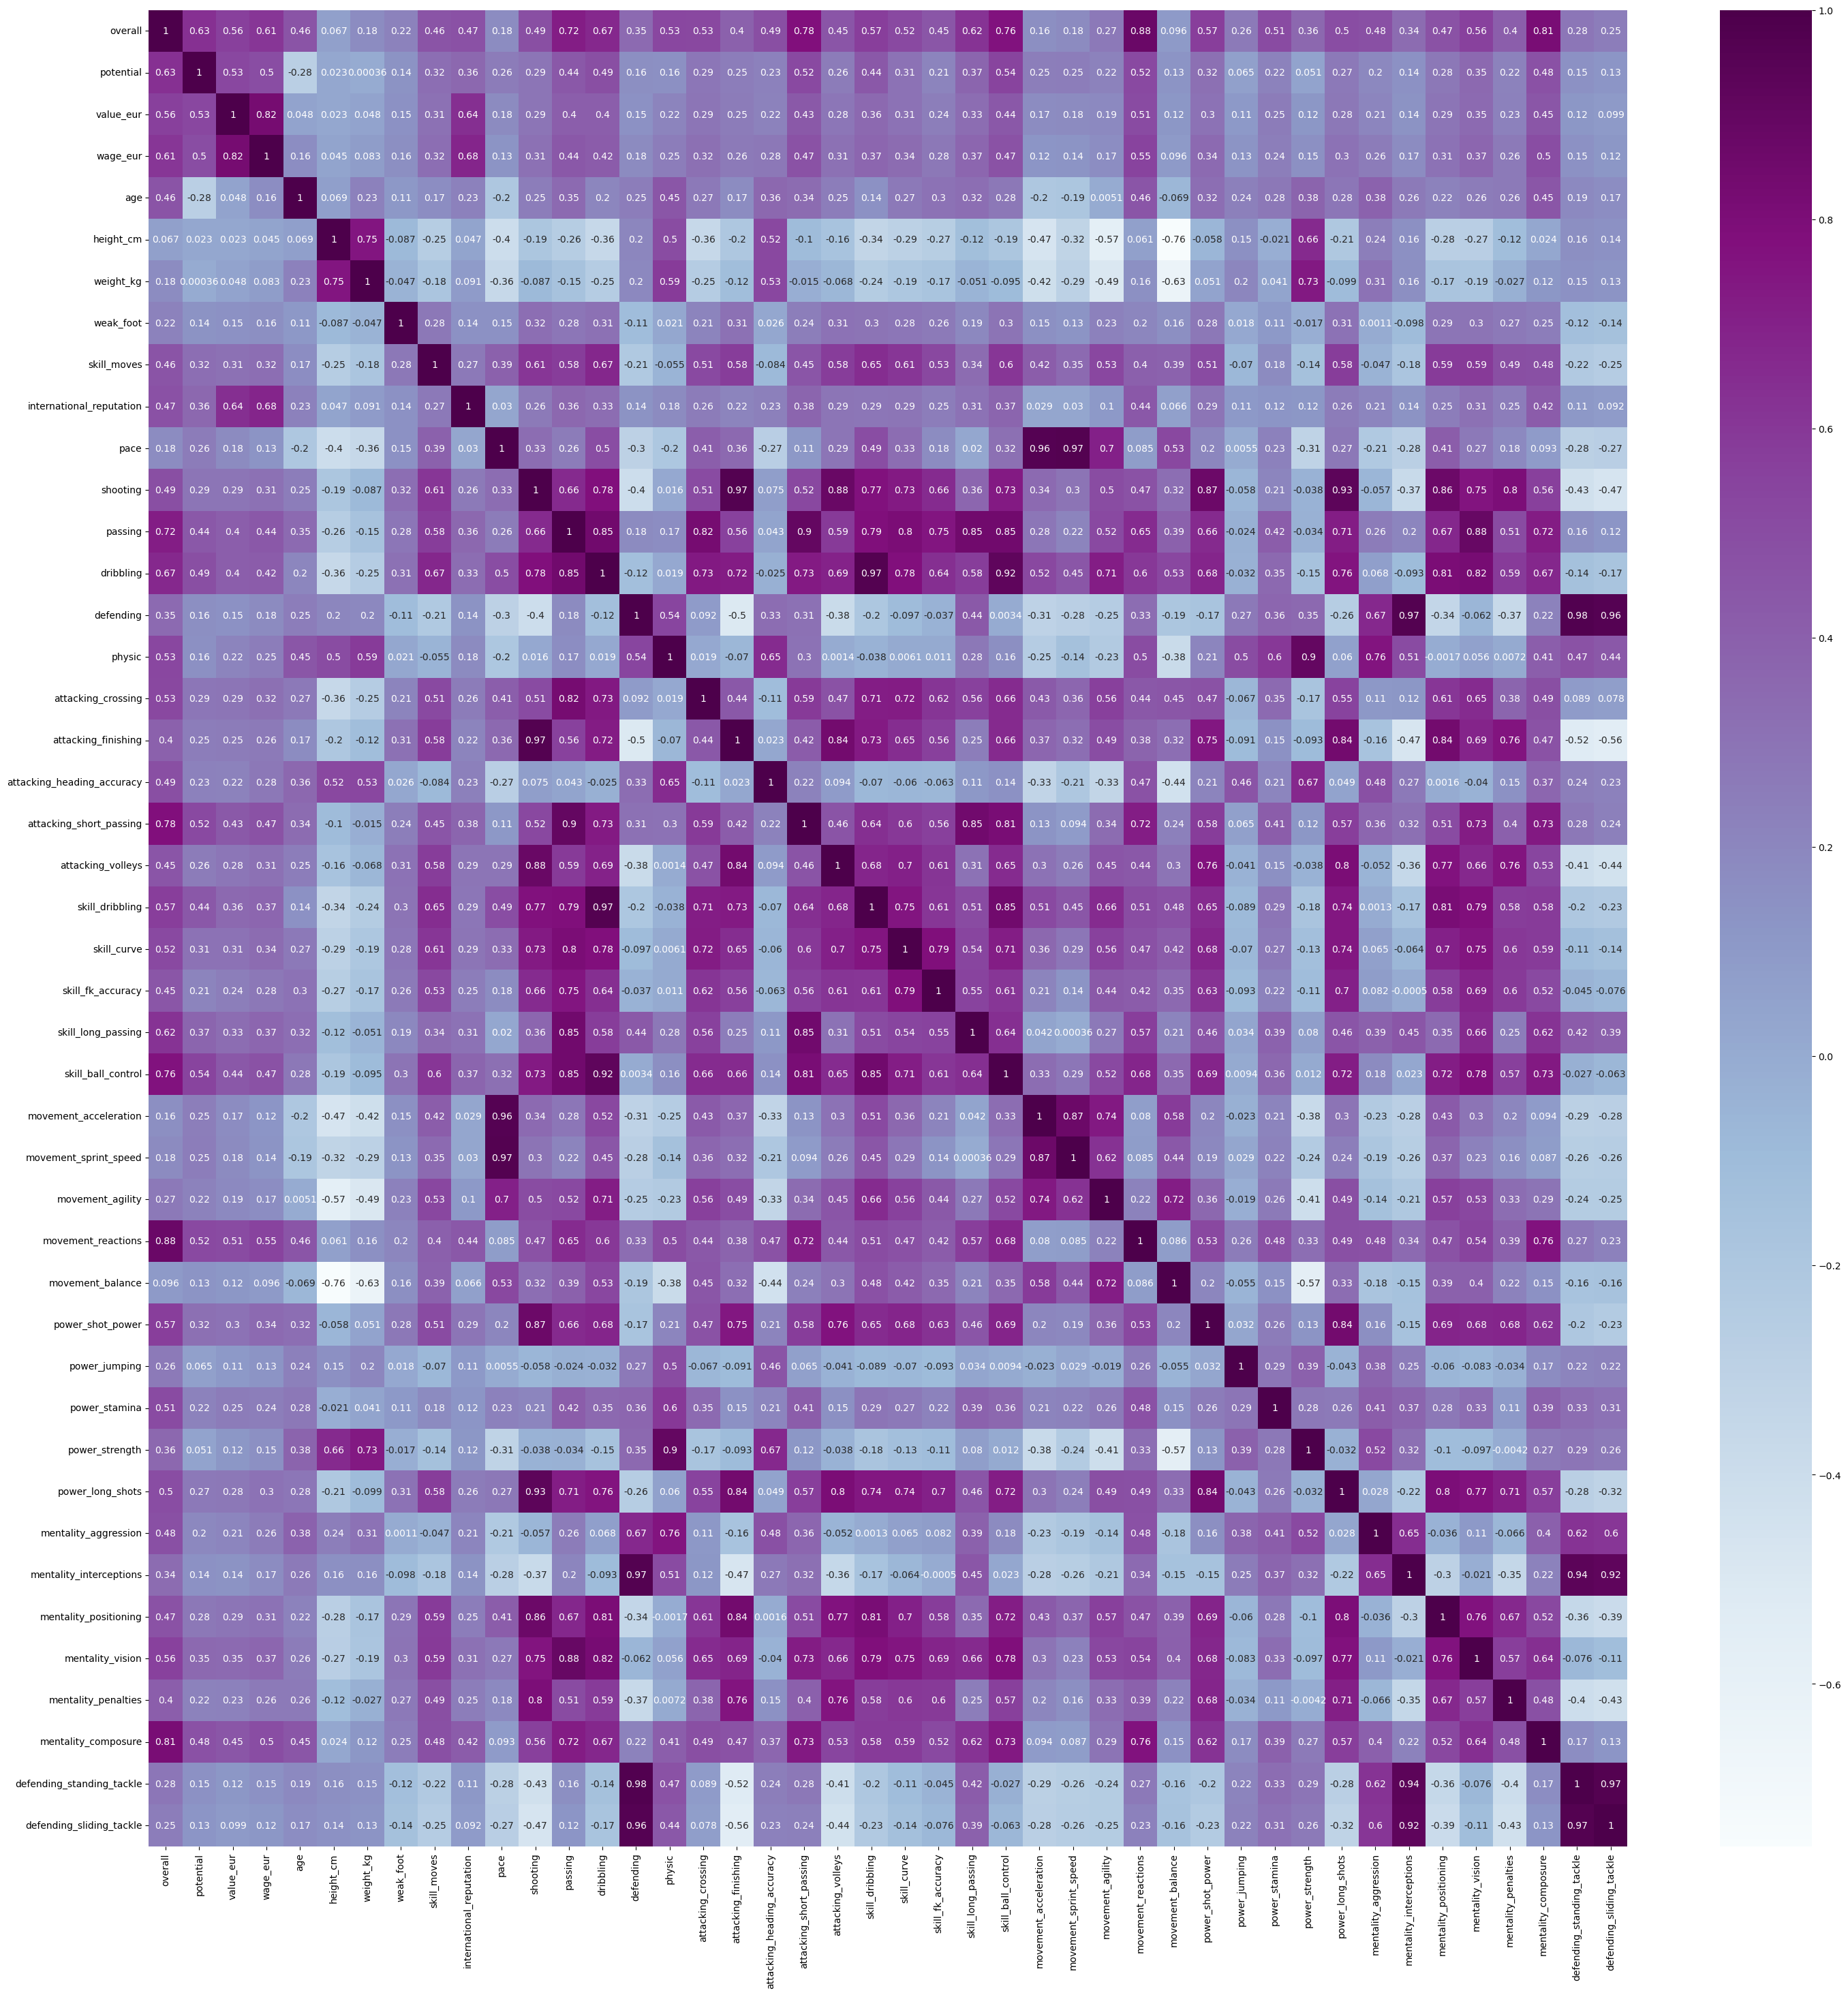

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35,35))
sns.heatmap(fifa_original.corr(numeric_only=True),annot=True,cmap='BuPu')


In [24]:
fifa_original.corr(numeric_only=True)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,...,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle
overall,1.000000,0.634567,0.564330,0.607433,0.460085,0.067144,0.175203,0.220011,0.458790,0.474402,...,0.357643,0.499155,0.480030,0.337333,0.467943,0.557643,0.403949,0.810966,0.283783,0.247359
potential,0.634567,1.000000,0.531120,0.496621,-0.279596,0.023136,0.000358,0.140494,0.323744,0.355948,...,0.051105,0.269917,0.195018,0.143938,0.276934,0.354160,0.219251,0.475238,0.146577,0.126377
value_eur,0.564330,0.531120,1.000000,0.824991,0.047941,0.023274,0.047823,0.148085,0.308249,0.638574,...,0.119728,0.275800,0.207681,0.142340,0.290857,0.347497,0.229420,0.447351,0.121318,0.099364
wage_eur,0.607433,0.496621,0.824991,1.000000,0.163904,0.044757,0.082610,0.156851,0.321580,0.678894,...,0.154321,0.303354,0.255479,0.171861,0.306460,0.366483,0.264177,0.495529,0.146302,0.122277
age,0.460085,-0.279596,0.047941,0.163904,1.000000,0.068523,0.225874,0.112761,0.165902,0.231102,...,0.376869,0.282849,0.383147,0.260870,0.223638,0.259370,0.262890,0.449656,0.187717,0.166452
height_cm,0.067144,0.023136,0.023274,0.044757,0.068523,1.000000,0.748979,-0.086987,-0.254799,0.046814,...,0.662117,-0.208390,0.242089,0.156613,-0.275553,-0.270561,-0.116591,0.024340,0.157938,0.144466
weight_kg,0.175203,0.000358,0.047823,0.082610,0.225874,0.748979,1.000000,-0.046637,-0.180745,0.091359,...,0.734660,-0.099311,0.305699,0.158364,-0.173882,-0.185087,-0.026969,0.117214,0.149605,0.134016
weak_foot,0.220011,0.140494,0.148085,0.156851,0.112761,-0.086987,-0.046637,1.000000,0.278478,0.144386,...,-0.016629,0.305455,0.001120,-0.097786,0.287404,0.297036,0.272216,0.251880,-0.124575,-0.139353
skill_moves,0.458790,0.323744,0.308249,0.321580,0.165902,-0.254799,-0.180745,0.278478,1.000000,0.272582,...,-0.139060,0.575203,-0.046610,-0.180775,0.586599,0.591049,0.491333,0.479330,-0.221845,-0.250990
international_reputation,0.474402,0.355948,0.638574,0.678894,0.231102,0.046814,0.091359,0.144386,0.272582,1.000000,...,0.121019,0.256447,0.208474,0.140613,0.249135,0.308754,0.249156,0.421198,0.112041,0.091909


In [25]:
c = fifa_original.corr(numeric_only=True).abs()

s = c.unstack()

so = s.sort_values(kind="quicksort",ascending=False)
sv=pd.DataFrame(so)
sv.columns=["Variable1"]
#so
sv

,,Variable1
overall,overall,1.000000
passing,passing,1.000000
attacking_volleys,attacking_volleys,1.000000
attacking_short_passing,attacking_short_passing,1.000000
attacking_heading_accuracy,attacking_heading_accuracy,1.000000
...,...,...
mentality_interceptions,skill_fk_accuracy,0.000499
skill_long_passing,movement_sprint_speed,0.000363
movement_sprint_speed,skill_long_passing,0.000363
potential,weight_kg,0.000358


In [26]:
# Columns with high correlation with each other
#movement acceleration and movement sprint speed 
#dribbling and skill dribbling
fifa_original = fifa_original.drop(['skill_dribbling'],axis=1)
fifa_original = fifa_original.drop(['movement_sprint_speed'],axis=1)

<Axes: xlabel='movement_reactions', ylabel='overall'>

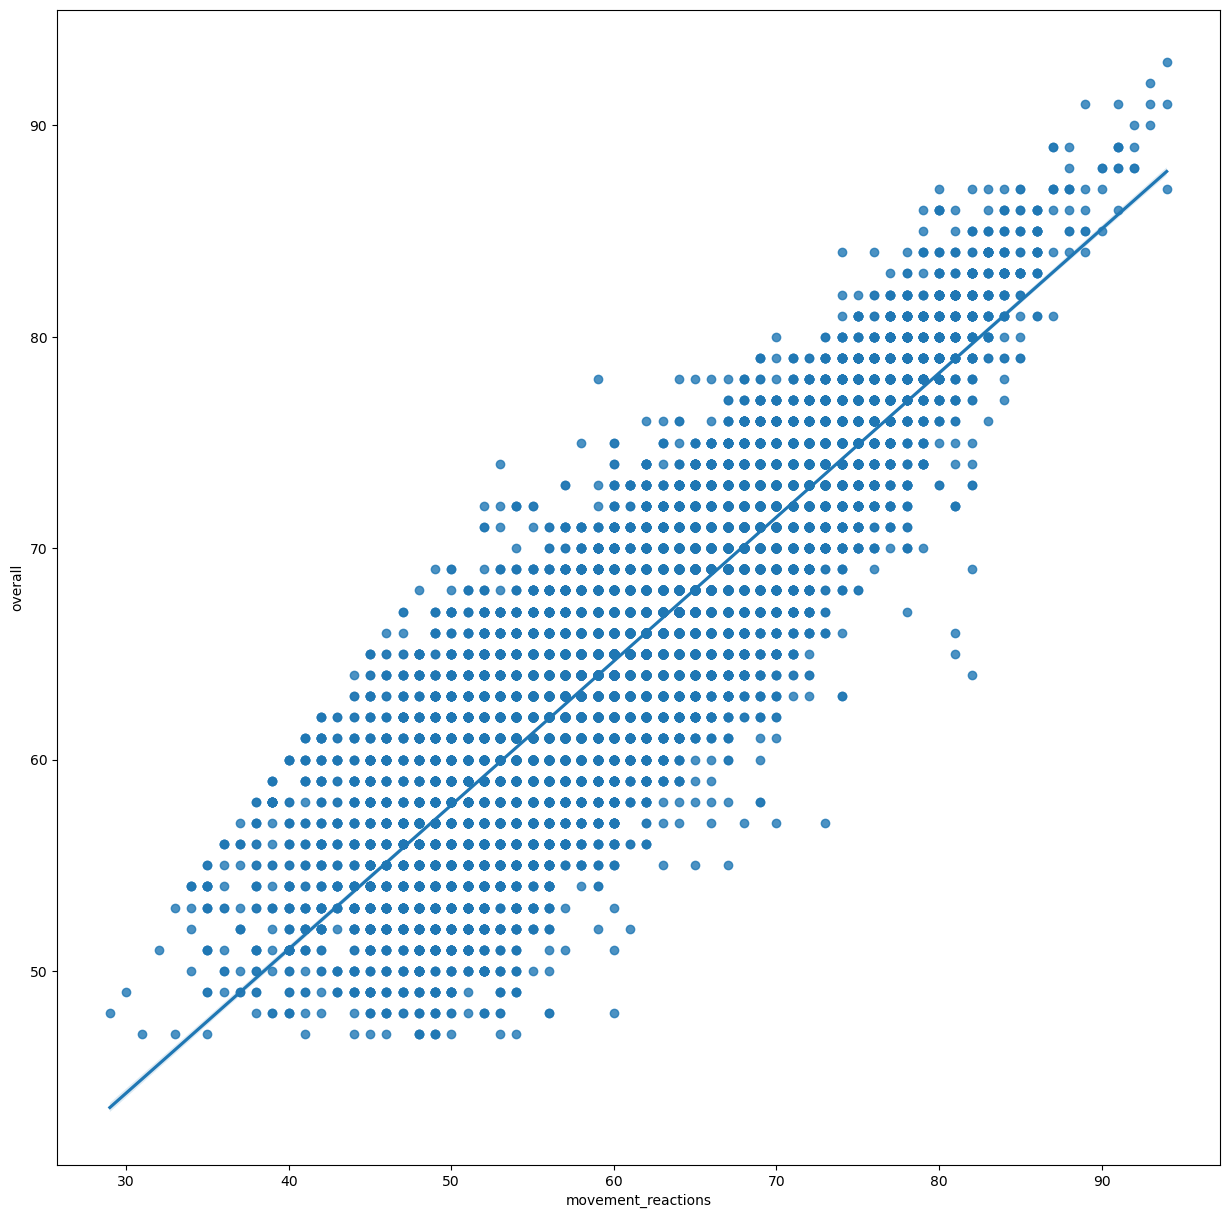

In [27]:
plt.figure(figsize=(15,15))
sns.regplot(x='movement_reactions',y='overall',data=fifa_original)

<Axes: xlabel='potential', ylabel='overall'>

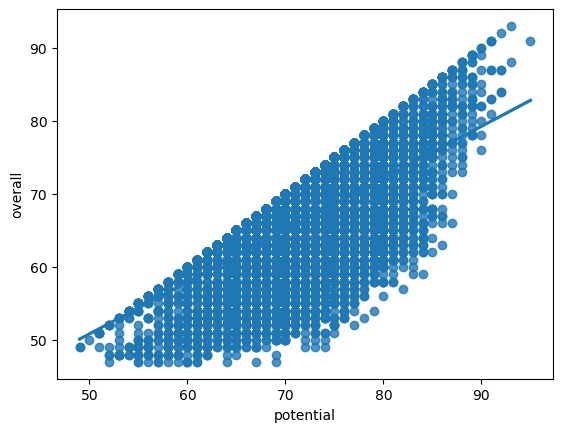

In [28]:
sns.regplot(x='potential',y='overall',data=fifa_original)

<Axes: xlabel='power_strength', ylabel='overall'>

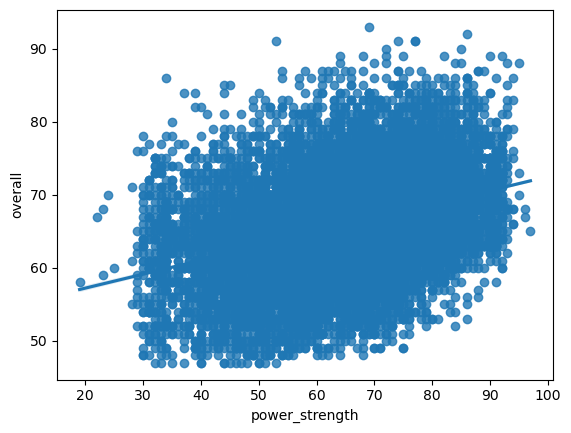

In [29]:
sns.regplot(x='power_strength',y='overall',data=fifa_original)

In [30]:
fifa_model = fifa_original.drop(['short_name',
                                'nationality_name',
                                'club_name',
                                'league_name',
                                'club_position',
                                'value_eur',
                                'wage_eur',
                                'preferred_foot',
                                'work_rate',
                                'international_reputation'],axis=1)

In [31]:
fifa_model.dtypes

overall                         int64
potential                       int64
age                             int64
height_cm                       int64
weight_kg                       int64
weak_foot                       int64
skill_moves                     int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_curve                     int64
skill_fk_accuracy               int64
skill_long_passing              int64
skill_ball_control              int64
movement_acceleration           int64
movement_agility                int64
movement_reactions              int64
movement_balance                int64
power_shot_p

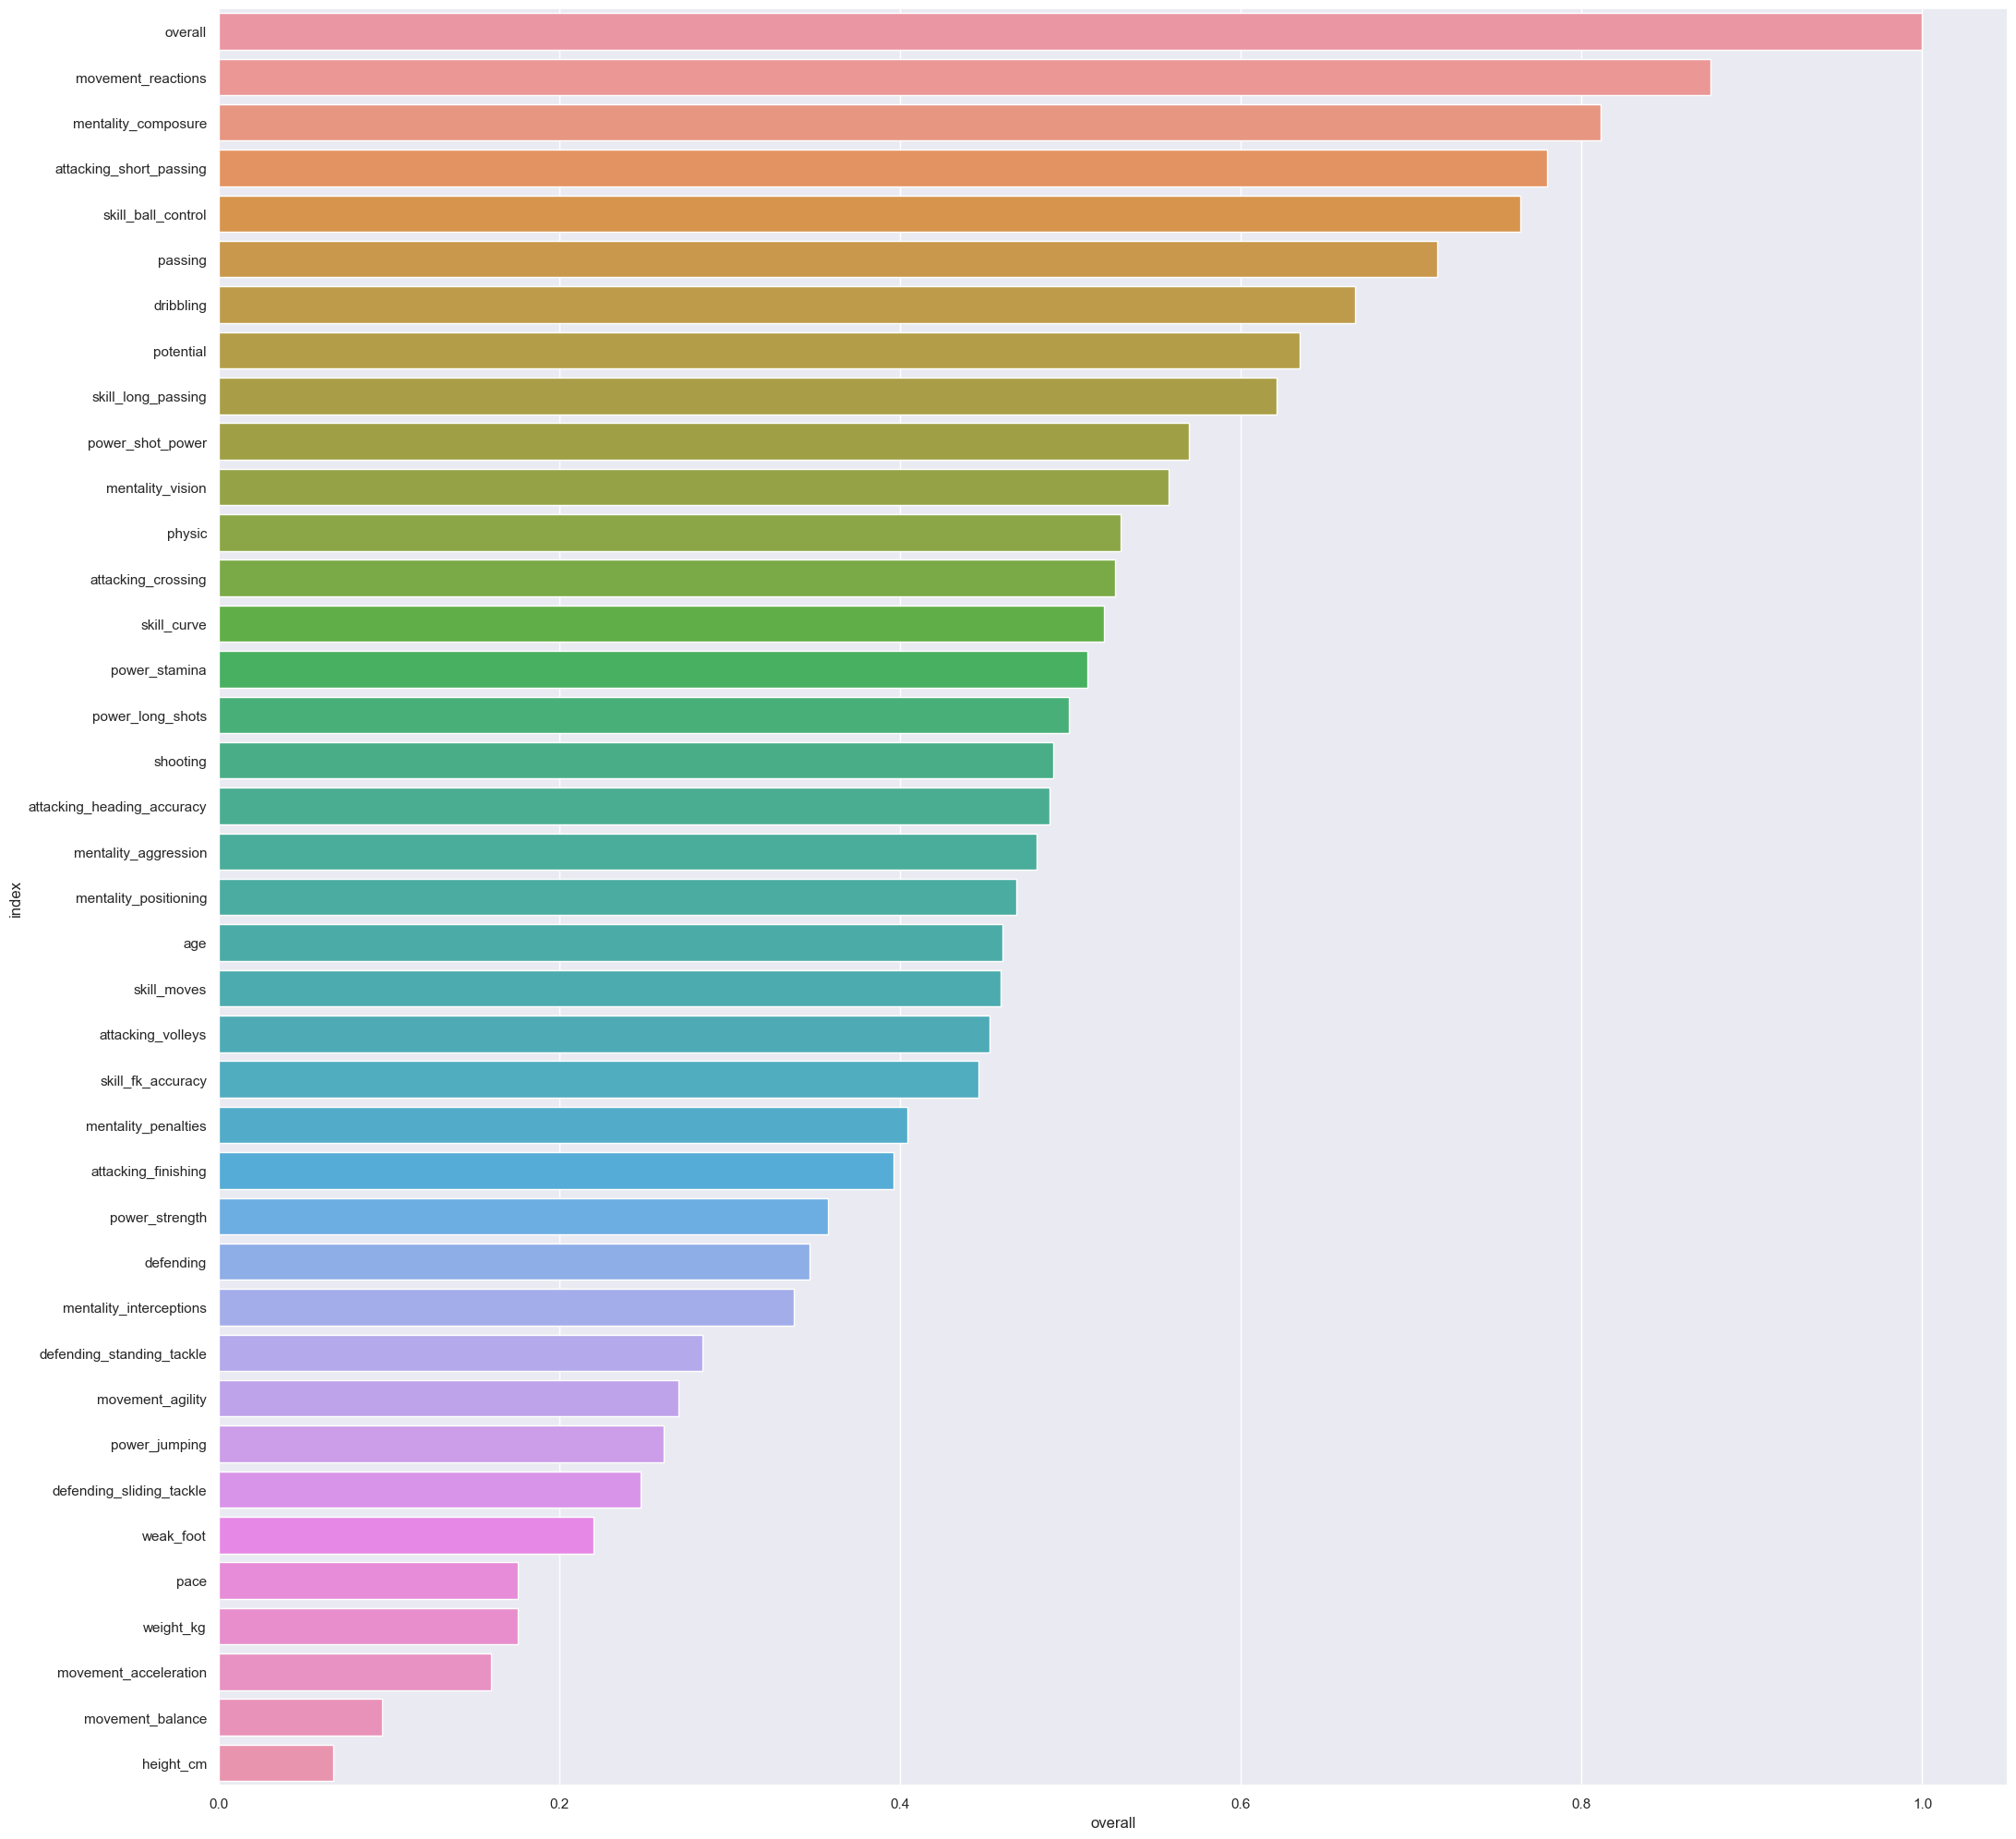

In [32]:
# Generated a plot to observe the correlation between target variable - overall and others
sns.set(rc = {'figure.figsize':(25,25)})
correlation_overall = pd.DataFrame(fifa_model.corr().overall).reset_index().sort_values(by = 'overall',ascending = False)
sns.barplot(x = 'overall',y = 'index',data = correlation_overall)
sns.set(rc = {'figure.figsize':(30,30)})

In [33]:
fifa_target = fifa_model.overall

# "fifa_train" consists of all the columns excluding the target column
fifa_train = fifa_model.drop(['overall'], axis = 1)

# Performed Train:Rem split of 70:30 
X_train, X_rem, y_train, y_rem = train_test_split(fifa_train,fifa_target, train_size=0.7)

# Performed Valid:Test split of 20:20 from Rem split(20) 
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Displayed the shape of Train,Valid,Test after split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(11928, 38)
(11928,)
(2556, 38)
(2556,)
(2557, 38)
(2557,)


(None, None)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = 100
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_valid)
score_knn = accuracy_score(y_valid, y_predict_knn)

print('r2 score: '+str(r2_score(y_valid, y_predict_knn)))

r2 score: 0.8680004116214779


In [35]:
y_test_knn=knn.predict(X_test)
testscore_knn = accuracy_score(y_test, y_test_knn)

print('r2 score: '+str(r2_score(y_test, y_test_knn)))

r2 score: 0.86621857813088


In [36]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
y_pred_dt=regressor.predict(X_valid)
#Computed the r2 score 
print('r2 score: '+str(r2_score(y_valid, y_pred_dt)))

r2 score: 0.9399475690644484


In [37]:
y_test_dt=regressor.predict(X_test)
testscore_dt = accuracy_score(y_test, y_test_dt)

print('r2 score: '+str(r2_score(y_test, y_test_dt)))

r2 score: 0.9363584543753389


In [38]:
# Performed Linear Regression fit and prediction on validation set
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_valid)

#Computed the r2 score 
print('r2 score: '+str(r2_score(y_valid, predictions)))

r2 score: 0.9363931156809692


In [39]:
y_test_lr=model.predict(X_test)
print('r2 score: '+str(r2_score(y_test, y_test_lr)))

r2 score: 0.936197196499287
